In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [27]:
def kmeans(data, k=3, normalize=False, limit=500):
    """Basic k-means clustering algorithm.
    """
    # optionally normalize the data. k-means will perform poorly or strangely if the dimensions
    # don't have the same ranges.
    if normalize:
        stats = (data.mean(axis=0), data.std(axis=0))
        data = (data - stats[0]) / stats[1]
    
    # pick the first k points to be the centers. this also ensures that each group has at least
    # one point.
    centers = data[:k]

    for i in range(limit):
        # core of clustering algorithm...
        # first, use broadcasting to calculate the distance from each point to each center, then
        # classify based on the minimum distance.
        classifications = np.argmin(((data[:, :, None] - centers.T[None, :, :])**2).sum(axis=1), axis=1)
        # next, calculate the new centers for each cluster.
        new_centers = np.array([data[classifications == j, :].mean(axis=0) for j in range(k)])

        # if the centers aren't moving anymore it is time to stop.
        if (new_centers == centers).all():
            break
        else:
            centers = new_centers
    else:
        # this will not execute if the for loop exits on a break.
        raise RuntimeError(f"Clustering algorithm did not complete within {limit} iterations")
            
    # if data was normalized, the cluster group centers are no longer scaled the same way the original
    # data is scaled.
    if normalize:
        centers = centers * stats[1] + stats[0]

    print(f"Clustering completed after {i} iterations")

    return classifications, centers
    

In [29]:
data = np.random.rand(200, 2)

classifications, centers = kmeans(data, k=5)

Clustering completed after 7 iterations


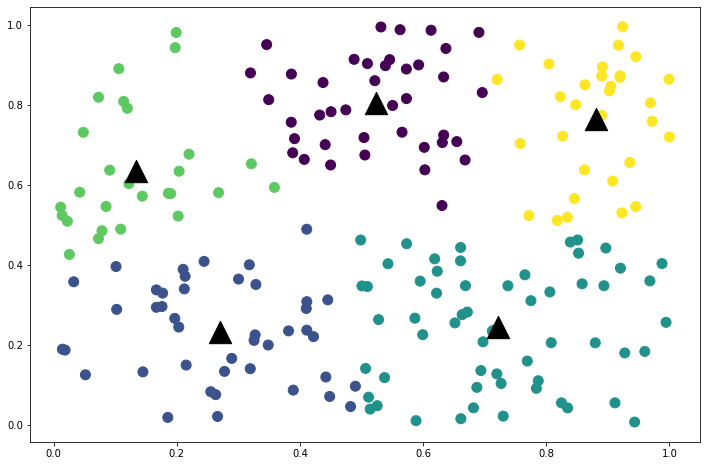

In [30]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(12, 8))
plt.scatter(x=data[:, 0], y=data[:, 1], s=100, c=classifications)
plt.scatter(x=centers[:, 0], y=centers[:, 1], s=500, c='k', marker='^');

Clustering completed after 13 iterations


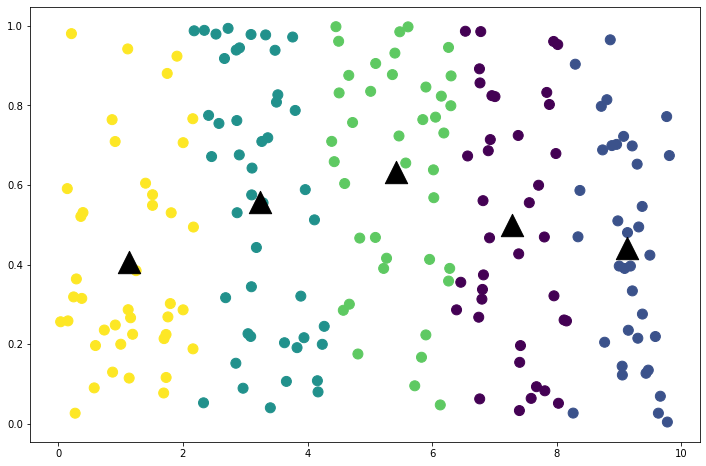

In [31]:
data = np.random.rand(200, 2)
data[:, 0] *= 10

classifications, centers = kmeans(data, k=5)

plt.figure(figsize=(12, 8))
plt.scatter(x=data[:, 0], y=data[:, 1], s=100, c=classifications)
plt.scatter(x=centers[:, 0], y=centers[:, 1], s=500, c='k', marker='^');

Clustering completed after 7 iterations


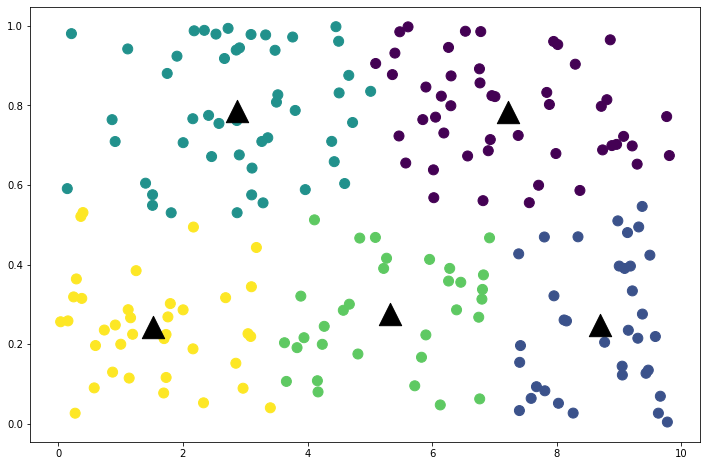

In [32]:
classifications, centers = kmeans(data, normalize=True, k=5)

plt.figure(figsize=(12, 8))
plt.scatter(x=data[:, 0], y=data[:, 1], s=100, c=classifications)
plt.scatter(x=centers[:, 0], y=centers[:, 1], s=500, c='k', marker='^');

Clustering completed after 16 iterations


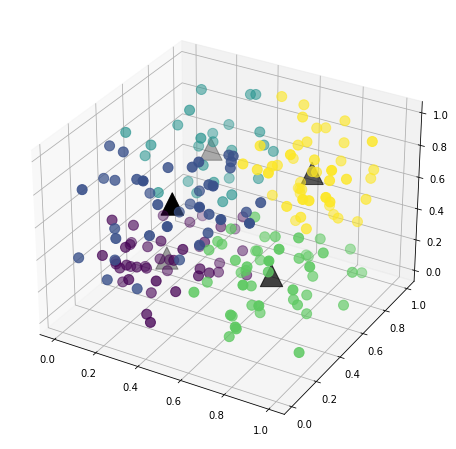

In [33]:
data = np.random.rand(200, 3)

classifications, centers = kmeans(data, normalize=True, k=5)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=classifications, s=100)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], s=500, c='k', marker='^');